In [1]:
import numpy as np

In [2]:
res=np.load('imdb.npz')
#将训练数据和测试数据加载进来
x_train=res['x_train']
y_train=res['y_train']
x_test=res['x_test']
y_test=res['y_test']
#将数据分好

In [3]:
res.files

['x_test', 'x_train', 'y_train', 'y_test']

237.71364


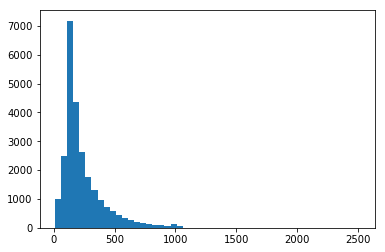

In [4]:
avg_len = list(map(len, x_train))
print(np.mean(avg_len))


import matplotlib.pyplot as plt
plt.hist(avg_len, bins = range(min(avg_len), max(avg_len) + 50, 50))
plt.show()
#做一个统计，看一下一个评论都有几个词，一个评论平均有237个词语

In [5]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM

Using Theano backend.


In [6]:
maxword = 400
x_train_pad = sequence.pad_sequences(x_train, maxlen = maxword)
x_test_pad = sequence.pad_sequences(x_test, maxlen = maxword)
vocab_size = np.max([np.max(x_train_pad[i]) for i in range(x_train_pad.shape[0])]) + 1

#由于我们的评论所包含的单词有多有少，所以需要统一一下单词个数，这里确定统一的单词个数为400个，少了补，多了删除。

In [7]:
model = Sequential()
model.add(Embedding(vocab_size, 300, input_length = maxword)) 

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics =['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 300)          26575500  
_________________________________________________________________
lstm_1 (LSTM)                (None, 400, 128)          219648    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 400, 64)           49408     
_________________________________________________________________
dropout_2 (Dropout)          (None, 400, 64)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
__________

In [8]:
model.fit(x_train_pad, y_train, validation_data = (x_test_pad, y_test), epochs = 20, batch_size = 100)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
11900/25000 [=============>................] - ETA: 1285s - loss: 0.5721 - acc: 0.7055

KeyboardInterrupt: 

In [16]:
scores = model.evaluate(x_test_pad, y_test)
print(scores)

25000/25000 [==============================] - 841s   
[0.34649008631706235, 0.86292000000000002]


In [ ]:
#64维度 20次迭代  0.845
#300维度 5次迭代 0.86